In [2]:
# Used for RF and linear SVM
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import pandas as pd
import os
import seaborn as sns
import pickle

In [3]:
# Import features
root_path = os.getcwd().replace("\\", "/") + "/Processing/CT/"
train = pd.read_excel(root_path + 'In vitro_DRR_no_id.xlsx')

# load the model from disk
filename = root_path + 'DRR_RF_fold_1.sav'
model = pickle.load(open(filename, 'rb'))

# Extract feature importances
features = list(train.columns)
importances = model.best_estimator_._final_estimator.feature_importances_

Text(0, 0.5, 'Features')

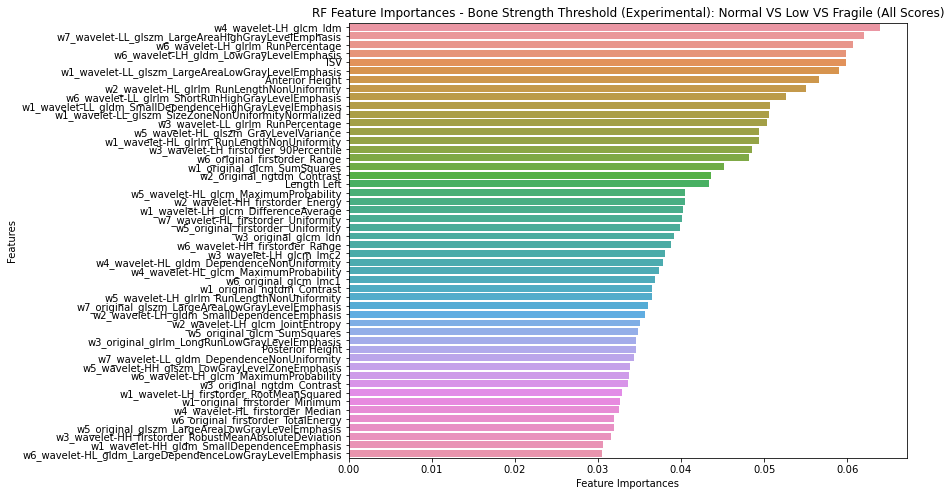

In [13]:
# Extract feature importances
feature_importances = pd.DataFrame({'feature': features,
                   'importance': importances}).\
                    sort_values('importance', ascending = False)

# Display
feature_importances.head()
 #Define size of bar plot
plt.figure(figsize=(10,8))
#Plot Searborn bar chart
sns.barplot(x=feature_importances['importance'][:50], y=feature_importances['feature'][:50])
#Add chart labels
plt.title('RF Feature Importances - Bone Strength Threshold (Experimental): Normal VS Low VS Fragile (All Scores)')
plt.xlabel('Feature Importances')
plt.ylabel('Features') 


In [14]:
#Save feature importances
results = pd.DataFrame({'feature': features,
                   'importance': importances})
excel_path = root_path + "/Feature importance/DRR_RF_fold 1.xlsx"
results.to_excel(excel_path)